# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utilitiesFun as ut

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from preProcessing_class import DataHandler

# Dataset

In [2]:
df = pd.read_csv("ecommerce_customer_data_large.csv", sep=",")

processingPipeLine = DataHandler(df, cutting=[18, 30, 70]) # minimum age: 18, maximum age: 70
processingPipeLine.preProcessing()  

data=processingPipeLine.dataAgg
features=processingPipeLine.features
label=processingPipeLine.label

In [3]:
[nome for nome in data.columns if 'Age' in nome]

['Age', 'AgeClass_18-30', 'AgeClass_30-70']

In [4]:
data.columns

Index(['totPurchase', 'meanPurchase', 'medianProdPrice', 'totQuantity',
       'meanQuantity', 'meanReturns', 'numOrders', 'last_PurchaseDate',
       'first_PurchaseDate', 'propWeekend', 'isMale', 'Churn', 'Age',
       'meanFreqPurchase_day', 'CustomerPurchaseLife_monthly', 'Recency',
       'AgeClass_18-30', 'AgeClass_30-70', 'ProdCategory_Books',
       'ProdCategory_Electronics', 'ProdCategory_Clothing',
       'ProdCategory_Home', 'PaymentMethod_Credit Card',
       'PaymentMethod_PayPal', 'PaymentMethod_Cash', 'CLTV'],
      dtype='object')

In [4]:
data.shape

(49146, 26)

In [6]:
label

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
49141,0
49142,0
49143,1
49144,0


In [7]:
features

,totPurchase,meanPurchase,medianProdPrice,totQuantity,meanQuantity,meanReturns,numOrders,last_PurchaseDate,first_PurchaseDate,propWeekend,...,AgeClass_18-30,AgeClass_30-70,ProdCategory_Books,ProdCategory_Electronics,ProdCategory_Clothing,ProdCategory_Home,PaymentMethod_Credit Card,PaymentMethod_PayPal,PaymentMethod_Cash,CLTV
0,5148,5148.000000,456.0,5,5.000000,0.000000,1,2021-04-08 18:33:34,2021-04-08 18:33:34,0.000000,...,0,1,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,16481,2746.833333,372.0,18,3.000000,0.666667,6,2023-07-03 17:26:19,2020-07-31 16:27:41,0.166667,...,0,1,0.166667,0.5,0.166667,0.166667,0.166667,0.500000,0.333333,0.155108
2,4687,4687.000000,188.0,3,3.000000,0.000000,1,2023-02-03 03:58:07,2023-02-03 03:58:07,0.000000,...,0,1,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,7826,1565.200000,328.0,19,3.800000,0.600000,5,2022-06-29 03:41:09,2020-10-12 22:03:10,0.000000,...,0,1,0.400000,0.2,0.200000,0.200000,0.200000,0.400000,0.400000,0.041571
4,7681,2560.333333,65.0,8,2.666667,1.000000,3,2022-03-25 08:43:48,2020-06-23 06:03:40,0.000000,...,1,0,0.666667,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,0.037987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49141,21762,3627.000000,295.5,20,3.333333,0.333333,6,2022-09-19 00:20:18,2020-09-05 07:32:48,0.333333,...,0,1,0.500000,0.0,0.000000,0.500000,0.000000,0.333333,0.666667,0.146081
49142,5714,2857.000000,199.0,8,4.000000,0.000000,2,2022-08-21 12:46:16,2021-07-22 19:03:00,0.500000,...,0,1,0.000000,0.5,0.500000,0.000000,0.000000,0.500000,0.500000,0.016286
49143,20495,2049.500000,218.5,30,3.000000,0.600000,10,2023-08-31 11:32:30,2020-05-01 10:59:19,0.400000,...,0,1,0.600000,0.2,0.200000,0.000000,0.400000,0.200000,0.400000,0.220232
49144,12709,2541.800000,133.0,15,3.000000,0.600000,5,2022-09-22 15:46:41,2020-07-23 06:56:05,0.000000,...,0,1,0.400000,0.2,0.200000,0.200000,0.200000,0.200000,0.600000,0.087313


## MODELS

### Splitting

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=123)

In [6]:
x_train.shape[0]/(x_train.shape[0]+x_test.shape[0]) *100

79.99837219712693

In [7]:
round(y_train['Churn'].sum()/y_train.shape[0], 4), round(y_test['Churn'].sum()/y_test.shape[0], 4)

(np.float64(0.2007), np.float64(0.1959))

In [8]:
scaler=StandardScaler()
x_train=x_train.drop(columns=['last_PurchaseDate', 'first_PurchaseDate'])
x_train=pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)

In [9]:
scaler=StandardScaler()
x_test=x_test.drop(columns=['last_PurchaseDate', 'first_PurchaseDate'])
x_test=pd.DataFrame(scaler.fit_transform(x_test), index=x_test.index, columns=x_test.columns)

### Baseline

In [10]:
prob = round(y_test['Churn'].sum()/y_test.shape[0], 4)
length = x_test.shape[0]

baseline = np.random.choice([0, 1], size=length, p=[1-prob, prob])

### Logistic Regression

In [11]:
logit_model = linear_model.LogisticRegression(random_state=123)
logit_model.fit(x_train, y_train['Churn'])

logit_pred = logit_model.predict(x_test)

In [12]:
logit_model.coef_, logit_model.intercept_

(array([[ 0.01545661,  0.00565392,  0.00088338, -0.06783729,  0.0157739 ,
         -0.01513119,  0.02784611, -0.02527237,  0.00625936,  0.00087171,
         -0.02433358,  0.08292649,  0.03405831,  0.0383607 ,  0.02807682,
          0.00852216, -0.00295672,  0.00457501, -0.01019932, -0.02212472,
          0.00895701,  0.01315719, -0.01315538]]),
 array([-1.38332156]))

In [9]:
x_train.columns

Index(['totPurchase', 'meanPurchase', 'medianProdPrice', 'totQuantity',
       'meanQuantity', 'meanReturns', 'numOrders', 'propWeekend', 'isMale',
       'Age', 'meanFreqPurchase_day', 'CustomerPurchaseLife_monthly',
       'Recency', 'AgeClass_18-30', 'AgeClass_30-70', 'ProdCategory_Books',
       'ProdCategory_Electronics', 'ProdCategory_Clothing',
       'ProdCategory_Home', 'PaymentMethod_Credit Card',
       'PaymentMethod_PayPal', 'PaymentMethod_Cash', 'CLTV'],
      dtype='object')

### Lasso

In [13]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(random_state=123, cv=5)         # parameter
lasso_cv.fit(x_train, y_train['Churn'])

lasso_pred = lasso_cv.predict(x_test)

### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train['Churn'])

bayes_pred = bayes_model.predict(x_test)

### K-nearest neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

precision_scorer = make_scorer(f1_score, zero_division=0)
scores = []

for k in range (1,26):            # parameter
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train['Churn'], cv=3, scoring=precision_scorer)   # parameter
    scores.append(np.mean(score))

Text(0, 0.5, 'F1 Score')

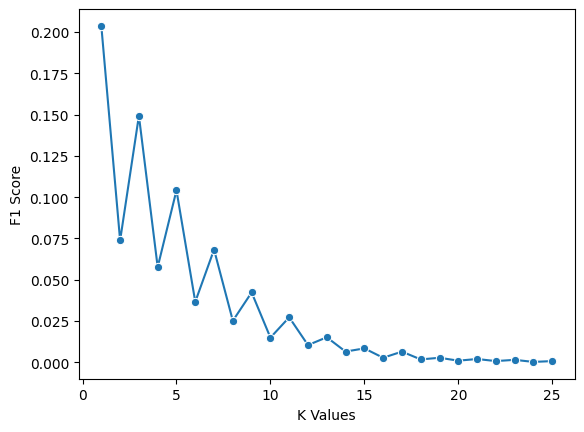

In [17]:
sns.lineplot(x = range (1,26), y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("F1 Score")

In [18]:
best_k = np.argmax(scores)+1

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train, y_train['Churn'])

knn_pred = knn_model.predict(x_test)

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)   # parameter
tree_model.fit(x_train, y_train['Churn'])

tree_pred = tree_model.predict(x_test)

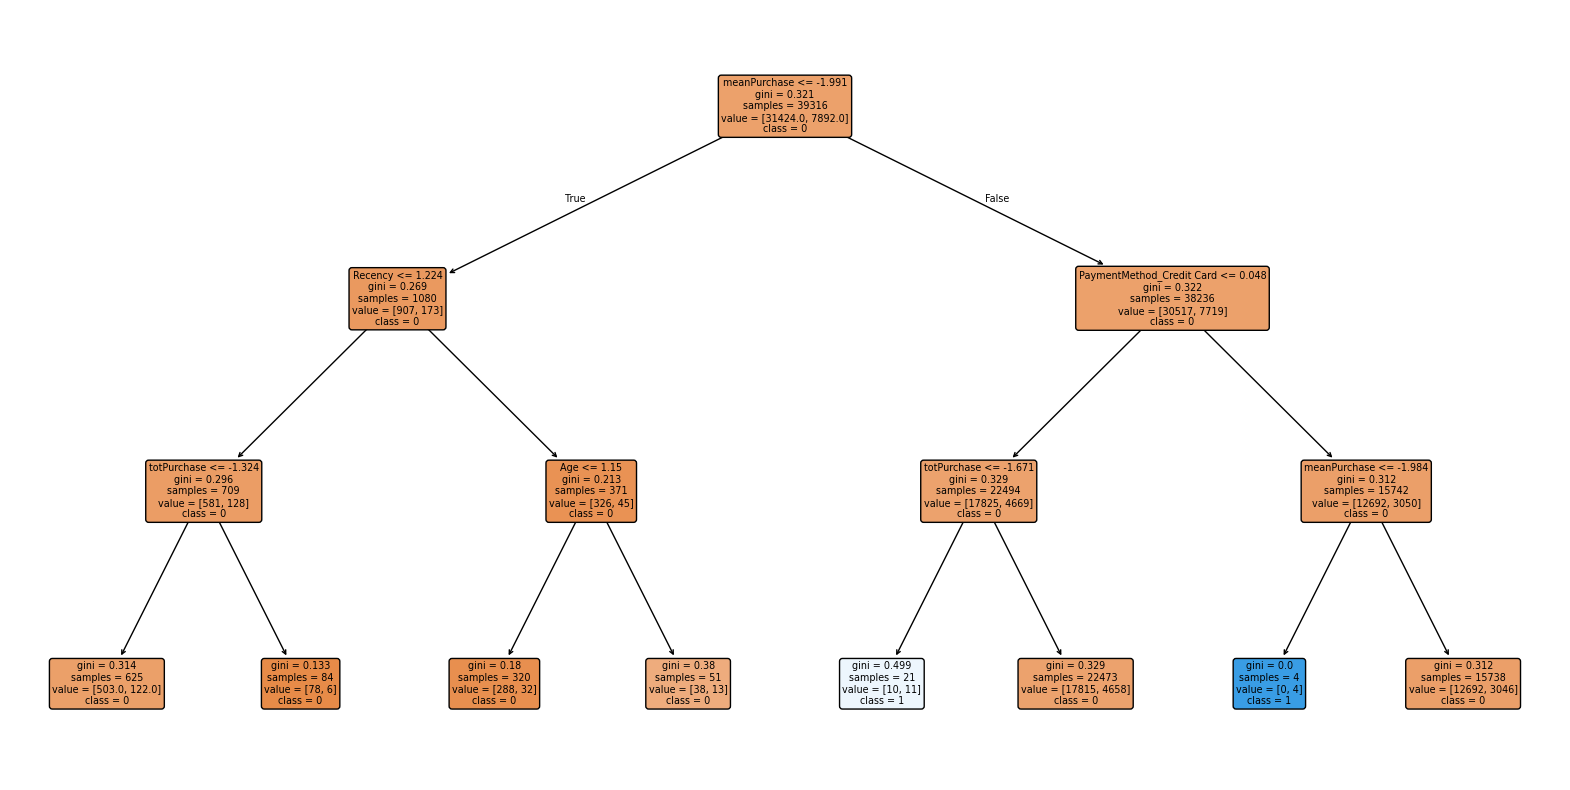

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, 
          feature_names=x_train.columns, 
          class_names=['0', '1'], 
          filled=True, 
          rounded=True)
plt.show()


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

precision_scorer = make_scorer(f1_score, zero_division=0)

scores = []
for i in range(1, 36):
    tree_model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(tree_model, x_train, y_train['Churn'], cv=3, scoring=precision_scorer)
    scores.append(np.mean(score))

Text(0, 0.5, 'Precision Score')

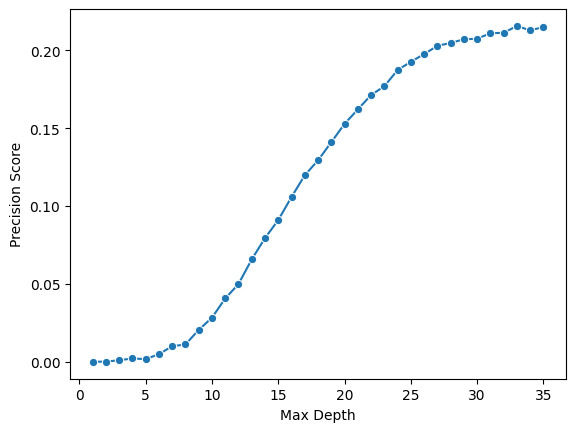

In [22]:
sns.lineplot(x = range(1,36), y = scores, marker = 'o')
plt.xlabel("Max Depth")
plt.ylabel("Precision Score")

In [23]:
best_depth = np.argmax(scores)+1
tree_model = DecisionTreeClassifier(max_depth=best_depth)
tree_model.fit(x_train, y_train['Churn'])

tree_pred = tree_model.predict(x_test)

# EVALUATION


### Confusion matrix

In [30]:
baseline, logit_pred, lasso_pred, bayes_pred, knn_pred, tree_pred

(array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([1., 1., 1., ..., 1., 1., 1.], shape=(9830,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([0, 0, 0, ..., 1, 0, 0], shape=(9830,)),
 array([1, 0, 1, ..., 0, 0, 1], shape=(9830,)))

In [25]:
from sklearn.metrics import f1_score
results=[]
for alpha in np.arange(0, 1, 0.005):
    predictions = [-1]*len(lasso_pred)
    for i in range(0, len(lasso_pred)):
        if lasso_pred[i] > alpha:
            predictions[i]=1
        else:
            predictions[i]=0
    results.append((f1_score(y_test['Churn'], predictions, zero_division=0.0), alpha))
    
results=pd.DataFrame(results, columns=['f1', 'alpha'])

Text(0, 0.5, 'f1 score')

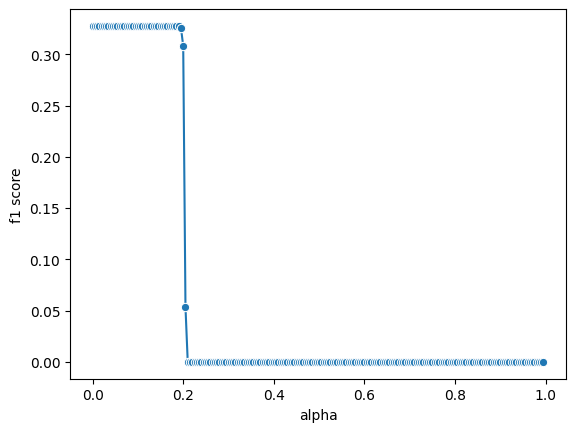

In [26]:
sns.lineplot(x = 'alpha', y = 'f1', marker = 'o', data=results)
plt.xlabel("alpha")
plt.ylabel("f1 score")

In [27]:
alpha=results[results['f1']==results['f1'].max()]['alpha'].max()
for i in range(0, len(lasso_pred)):
        if lasso_pred[i] > alpha:
            lasso_pred[i]=1
        else:
            lasso_pred[i]=0

In [31]:
baseline, logit_pred, lasso_pred, bayes_pred, knn_pred, tree_pred

(array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([1., 1., 1., ..., 1., 1., 1.], shape=(9830,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(9830,)),
 array([0, 0, 0, ..., 1, 0, 0], shape=(9830,)),
 array([1, 0, 1, ..., 0, 0, 1], shape=(9830,)))

In [29]:
confusionMatrix = confusion_matrix(y_test, logit_pred)
confusionMatrix
#  actual\pred   NO    YES
#     NO
#     YES

array([[7904,    0],
       [1926,    0]])

In [32]:
from sklearn.metrics import f1_score, precision_score
predictors = [baseline, logit_pred, lasso_pred, bayes_pred, knn_pred, tree_pred]

scoreMatrix_test = []
for predictor in predictors:
    precision = precision_score(y_test['Churn'], predictor, zero_division=0.0)
    f1 = f1_score(y_test['Churn'], predictor, zero_division=0.0)
    name=ut.get_var_name(predictor)[0].split("_")[0]
    scoreMatrix_test.append((name, precision, f1))
scoreMatrix_test=pd.DataFrame(scoreMatrix_test, columns=['model', 'precision', 'f1'])

In [33]:
scoreMatrix_test

,model,precision,f1
0,baseline,0.197002,0.193991
1,logit,0.000000,0.000000
2,lasso,0.195931,0.327662
3,bayes,0.000000,0.000000
4,knn,0.204444,0.209567
5,tree,0.197309,0.201373


### ROC/AUC

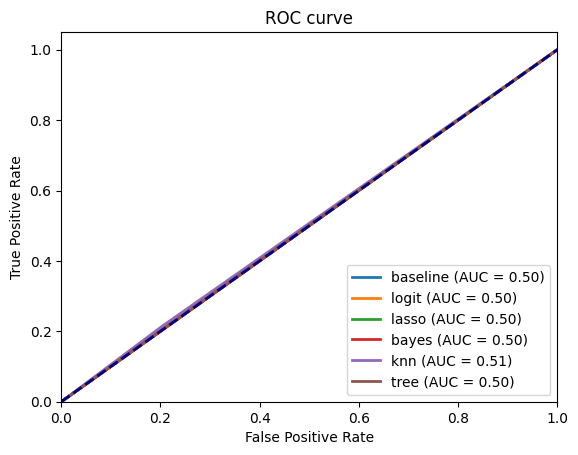

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

predictors = [baseline, logit_pred, lasso_pred, bayes_pred, knn_pred, tree_pred]

plt.figure()

for predictor in predictors:
    name=ut.get_var_name(predictor)[0].split("_")[0]
    fpr, tpr, thresholds = roc_curve(y_test['Churn'], predictor)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
                                                                    ## due cifre decimali, float
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')       

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()